This example is derived from: https://github.com/stardist/stardist/blob/master/examples/2D/3_prediction.ipynb

In [1]:
import rand_cmap
new_cmap = rand_cmap.rand_cmap(1000, type='bright', first_color_black=True, last_color_black=False, verbose=False)

In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [3]:
X = sorted(['test.tif'])
X = list(map(imread,X))

n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
axis_norm = (0,1)   # normalize channels independently
# axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))


In [ ]:
demo_model = False

if demo_model:
    print (
        "NOTE: This is loading a previously trained demo model!\n"
        "      Please set the variable 'demo_model = False' to load your own trained model.",
        file=sys.stderr, flush=True
    )
    #model = StarDist2D.from_pretrained('2D_demo')
    #model = StarDist2D.from_pretrained('2D_paper_dsb2018')
    model = StarDist2D.from_pretrained('2D_versatile_fluo')
else:
    model = StarDist2D(None, name='stardist', basedir='models')
None;

2023-01-23 16:01:26.707041: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


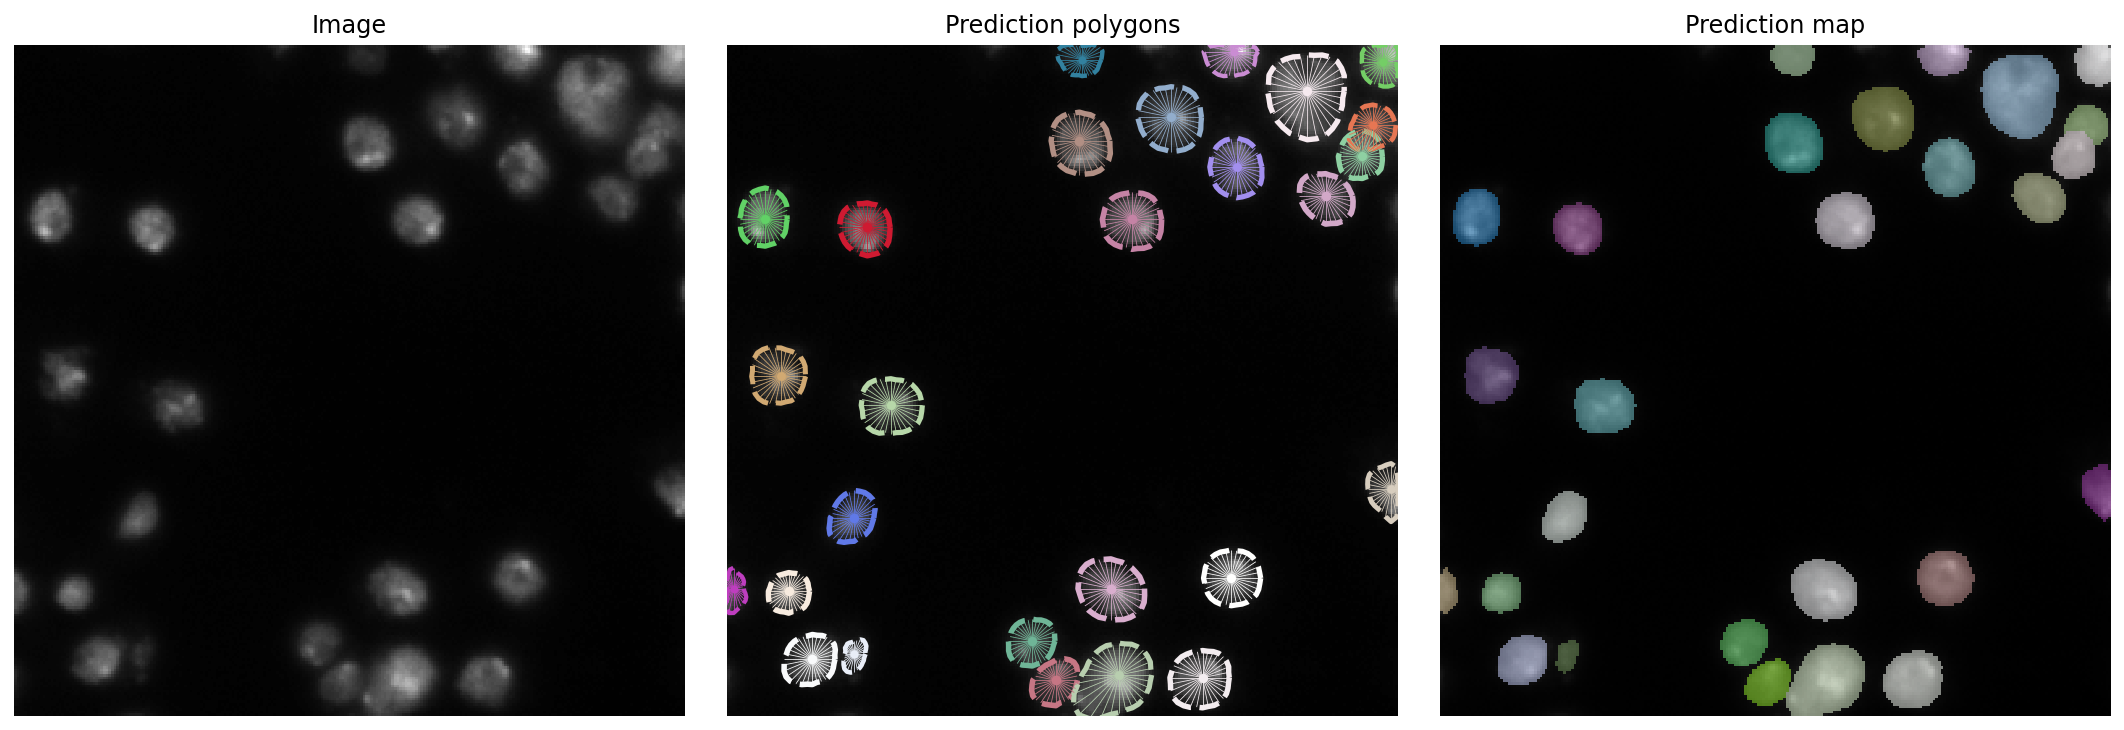

In [5]:
img = normalize(X[0], 1,99.8, axis=axis_norm)
labels, details = model.predict_instances(img)

plt.figure(figsize=(15,5))
img_show = img if img.ndim==2 else img[...,0]
coord, points, prob = details['coord'], details['points'], details['prob']

plt.subplot(131);
plt.imshow(img_show, cmap='gray');
plt.axis('off')
a = plt.axis()
plt.title("Image")

plt.subplot(132);
plt.imshow(img_show, cmap='gray');
plt.axis('off')
_draw_polygons(coord, points, prob, show_dist=True)
plt.axis(a)
plt.title("Prediction polygons")

plt.subplot(133);
plt.imshow(img_show, cmap='gray');
plt.axis('off')
plt.axis(a)
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.title("Prediction map")

plt.tight_layout()
plt.show()